In [1]:
"""
    Experimentation with neural networks on a datset of MRI covid/non-covid images.
    
    Created: 10/21/2020
    Author(s): Ben Flanders (brf97486)
    
    
    Potential source of getting all layer predictions: https://stackoverflow.com/questions/51677631/keras-tensorflow-get-predictions-or-output-of-all-layers-efficiently

"""

import cv2
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import *

from DataHandler import dataHandler


In [2]:
dh = dataHandler() # data handler object. See DataHandler.py for more information.

# ALTER HYPERPARAMETERS HERE
BATCH_SIZE = 16




In [3]:
dataset = dh.get_all_data_labeled(shuffle=True)

In [4]:
# check that all data is in place
assert len(dh.get_non_covid_data_fp()) == 397 and len(dh.get_covid_data_fp()) == 349 and len(dh.get_all_data_labeled()) == (397 + 349)

In [5]:
datapoint = dataset[0] # get some datapoint from the dataset
random_img = cv2.imread(datapoint[0])

Label:  0.0
filepath:  /Users/benflanders/Documents/github/COVID-19-CT-image-analysis-CSCI_8955/data/CT_NonCOVID/575.png
image dimensions:  (385, 507, 3)
image datatype:  uint8
image max:  255
image min


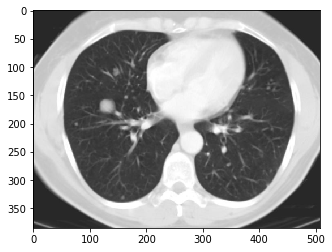

In [6]:
print("Label: ", datapoint[1])
print("filepath: ", datapoint[0])
print("image dimensions: ", random_img.shape)
print("image datatype: ", random_img.dtype)
print("image max: ", random_img.max())
print("image min")
plt.imshow(random_img)

In [7]:
# split the dataset into a train and test dataset

split_point = int(len(dataset) * .8 ) # 80 / 20 split

train_data = dataset[0:split_point]
test_data = dataset[split_point:]

assert len(train_data) + len(test_data) == (397 + 349) # ensure all expected data is present

In [8]:
# get the image data and load it into memory

train_X = np.asarray([dh.load_image(fp, resize=True, add_noise=True, randomly_rotate=True) for (fp, label) in train_data]).astype('uint8')
train_y = np.asarray([label for (fp, label) in train_data]).astype('float16')

test_X = np.asarray([dh.load_image(fp, resize=True) for (fp, label) in test_data]).astype('uint8')
test_y = np.asarray([np.asarray(label) for (fp, label) in test_data]).astype('float16')

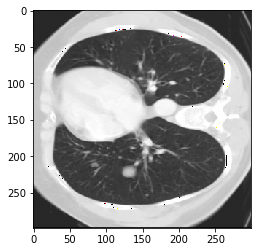

In [9]:
plt.imshow(train_X[0])

In [ ]:
# Sequential API
'''
model = tf.keras.Sequential(
    [
        Input([299, 299, 3], dtype=tf.uint8),
        tf.keras.layers.Lambda(lambda i:tf.cast(i, tf.float32)),
        Lambda(lambda x:tf.keras.applications.inception_v3.preprocess_input(x)),
        tf.keras.applications.InceptionV3(weights='imagenet', include_top=False),
        Flatten(),
        Dense(16, activation='relu', dtype=tf.float32),
        Dense(1, activation='sigmoid', dtype=tf.float32)    
    ])
'''

"""
# Functinal API

i = Input([299, 299, 3], dtype=tf.uint8)
x = Lambda(lambda x: tf.cast(x, tf.float32))(i)

#x = tf.cast(i, tf.float32)
#x = tf.keras.applications.inception_v3.preprocess_input(x)
core = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(299,299,3))(x)
core.trainable = False
#x = core(i)
x = Flatten()(core)
x = Dense(16, activation='relu', dtype=tf.float32)(x)
prediction = Dense(1, activation='sigmoid', dtype=tf.float32)(x)

model = tf.keras.Model(inputs=[i], outputs=[prediction])


#img = tf.image.decode_jpeg(tf.io.read_file(datapoint[0]))
#result = model(img)

# model = tf.keras.applications.InceptionV3(include_top=)


# compile model to train based on mse using the Adam Optimizer. Metrics displayed is accuracy.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='acc')

for lay in model.layers:
    if lay.name == 'inception_v3':
        lay.trainable = False
        
"""

In [ ]:
inception_model = tf.keras.applications.InceptionV3(weights='imagenet',include_top=False)
inception_model.trainable = False
x = inception_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(16, activation='relu', dtype=tf.float32)(x)
prediction = Dense(1, activation='sigmoid', dtype=tf.float32)(x)





complete_model = tf.keras.Model(inputs=inception_model.input,outputs=prediction)

visualization_model = tf.keras.Model(inputs=inception_model.input, 
                                    outputs=[l.output for l in complete_model.layers[1:] if 'conv' in l.name])



complete_model.compile(optimizer='adam', loss='binary_crossentropy', metrics='acc')

for lay in complete_model.layers:
    lay.trainable = True

# just the very last layer should be trainable for now
complete_model.layers[len(complete_model.layers)-1].trainable = True




In [ ]:
complete_model.summary()

In [ ]:
visualization_model.summary()

In [ ]:
complete_model.fit(x=train_X, y=train_y, batch_size=BATCH_SIZE, validation_data=(test_X, test_y), epochs=100)

In [ ]:
conv_lays = []

count = 0
    
for lay in complete_model.layers:
    if 'conv' in lay.name:
        conv_layer = lay
        conv_lays.append(lay)
        
print("Number of convolution layers: ", len(conv_lays))

In [ ]:
kernel_images = conv_layer.kernel

In [ ]:
print(kernel_images.shape)

plt.imshow(kernel_images[0][0])

In [ ]:

datapoint = test_data[len(test_data)-1]

img_data = np.asarray([dh.load_image(datapoint[0], resize=True)]).astype('uint8')

print("datapoint label: ", datapoint[1])
print("model prediction: ", complete_model.predict(img_data))

all_layer_outputs = visualization_model.predict(img_data)

In [ ]:

for l in inception_layer.layers[2:]:
    if 'conv' in l.name:
        print(l.output) 


In [ ]:
layer_0_conv_out = all_layer_outputs[93][0]
layer_0_conv_out.shape
plt.imshow(layer_0_conv_out[:,:,0])